In [2]:
# Import all necessary libraries

import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image,ImageOps
import matplotlib.image as mping
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.layers import Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

In [ ]:
# mask=r'C:\Users\z019130\Desktop\common doc\mask detection\dataset\with_mask'
# route=os.listdir(mask)

In [ ]:
# with_mask=[]
# for i in route:
#     dir=os.path.join(mask,i)
#     img=cv2.imread(dir)
#     img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#     img=img_to_array(img)
#     with_mask.append(img)

In [3]:
# importing all images from drive
DIRECTORY = r"C:\Users\z019130\Desktop\common doc\mask detection\dataset"

# assigning labels to each image
CATEGORIES = ["with_mask", "without_mask"]
data = []
labels = []

# loop to run through all images
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        
#         converting to grey scale image
        image=Image.open(img_path).convert('L')
        image=image.resize((32,32))
        
#         converting image to numbers between 0 and 255
        image=img_to_array(image)
        data.append(image)
        if category=="with_mask":
            labels.append(1)
        else:
            labels.append(0)     

C:\Users\z019130\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\Image.py:974: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [4]:
data=np.array(data)

In [5]:
data.shape

(3833, 32, 32, 1)

In [6]:
labels=np.array(labels)

In [7]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
labels.shape

(3833,)

In [9]:
# splitting data into train and test( test being 20% of the data)
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size=0.2)

In [10]:
# converting in between 0 to 1
x_train=x_train/255

In [11]:
x_train=x_train.reshape(x_train.shape[0],32,32,1)

In [12]:
x_train.ndim

4

In [13]:
x_train.shape

(3066, 32, 32, 1)

In [14]:
y_train.shape

(3066,)

In [15]:
# to increase the number of samples 

from keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10)
datagen.fit(x_train)
batches = datagen.flow(x_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [17]:
# implementing convolutional neural networks

model = Sequential()
model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
model.add(Conv2D(60, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(Conv2D(30, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(lr = 0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=50),
                            steps_per_epoch=10,
                            epochs=50,
                            shuffle = 1)


C:\Users\z019130\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
10/10 [==============================] - 5s 281ms/step - loss: 0.6952 - accuracy: 0.4668
Epoch 2/50
10/10 [==============================] - 3s 299ms/step - loss: 0.6865 - accuracy: 0.5309
Epoch 3/50
10/10 [==============================] - 3s 284ms/step - loss: 0.6623 - accuracy: 0.5948
Epoch 4/50
10/10 [==============================] - 3s 286ms/step - loss: 0.6533 - accuracy: 0.6283
Epoch 5/50
10/10 [==============================] - 3s 289ms/step - loss: 0.6362 - accuracy: 0.5485
Epoch 6/50
10/10 [==============================] - 3s 277ms/step - loss: 0.5719 - accuracy: 0.6950
Epoch 7/50
10/10 [==============================] - 3s 295ms/step - loss: 0.5495 - accuracy: 0.7119
Epoch 8/50
10/10 [==============================] - 3s 264ms/step - loss: 0.5080 - accuracy: 0.7709
Epoch 9/50
10/10 [==============================] - 3s 286ms/step - loss: 0.5206 - accuracy: 0.7589
Epoch 10/50
10/10 [==============================] - 3s 281ms/step - loss: 0.5629 - accuracy: 0.6987

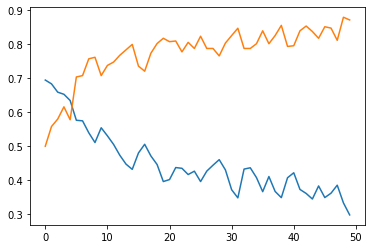

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [21]:
# predicting one sample image 
def predict_image(img):
    plt.imshow(img)
    img=img/255
    img=img.reshape(1,32,32,1)
    x=model.predict_classes(img)
    if x==1:
        return "with mask"
    return 'without mask'
#     return x

C:\Users\z019130\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


without mask


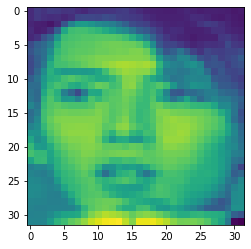

In [25]:
print(predict_image(x_test[700]))

In [26]:
x_test.shape

(767, 32, 32, 1)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_pred=[]
for i in x_test:
    i=i/255
    i=i.reshape(1,32,32,1)
    y_pred.append(model.predict_classes(i))
#     test_accuracy=accuracy_score(y_test,y_pred)

C:\Users\z019130\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [33]:
y_pred=np.array(y_pred)

In [34]:
y_pred.shape

(767, 1, 1)

In [47]:
y_test=y_test.reshape(y_test.shape[0])
y_pred=y_pred.reshape(y_pred.shape[0])

In [48]:
y_test.shape

(767,)

In [50]:
test_accuracy=accuracy_score(y_test,y_pred)

In [53]:
print("test accuracy: ",test_accuracy)

test accuracy:  0.8683181225554107


In [56]:
print("confusion matrix")
print(confusion_matrix(y_test,y_pred))

confusion matrix
[[333  66]
 [ 35 333]]
